In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the train and test datasets
train_data = pd.read_csv("/content/drive/MyDrive/train.csv")
test = pd.read_csv("/content/drive/MyDrive/test.csv")

# Display basic information about the training data
print("Train Data Information:")
train_data.info()


Train Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


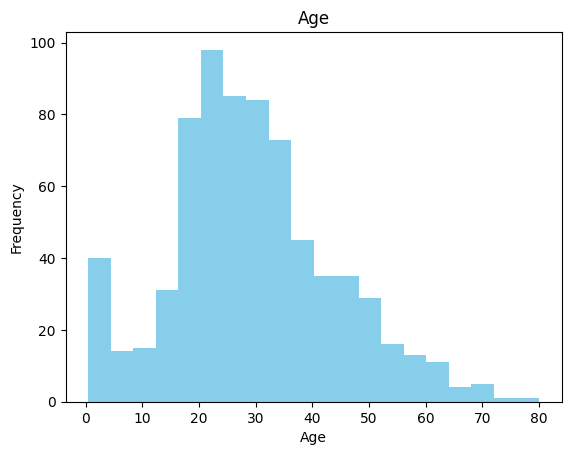

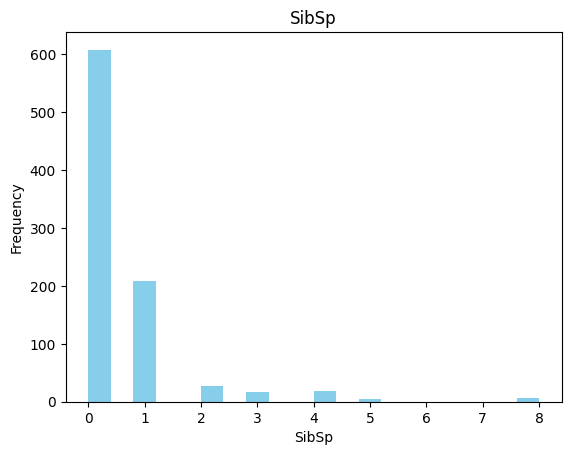

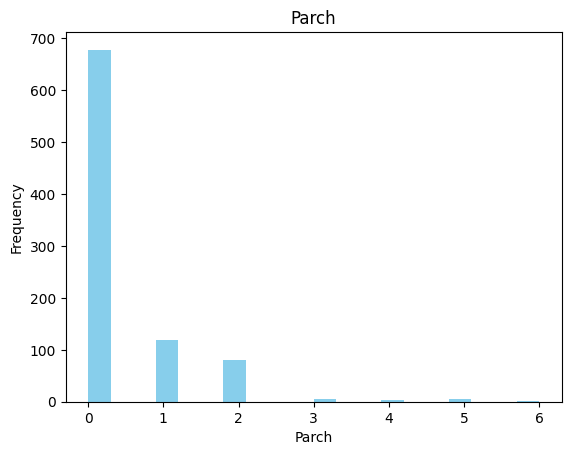

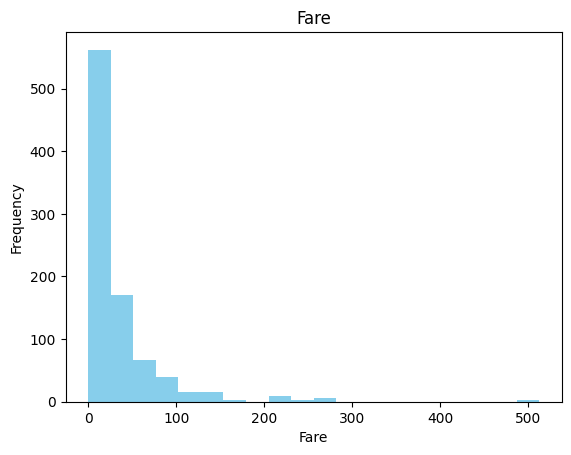

In [9]:
# Separate numerical columns for analysis
df_num = train_data[["Age", "SibSp", "Parch", "Fare"]]

# Visualize numerical features
for col in df_num.columns:
    plt.hist(df_num[col].dropna(), bins=20, color='skyblue')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


<ipython-input-10-3ab1e939258d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette="Set2")


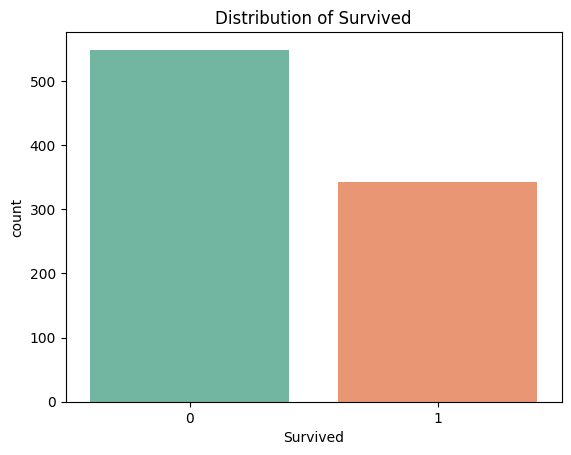

<ipython-input-10-3ab1e939258d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette="Set2")


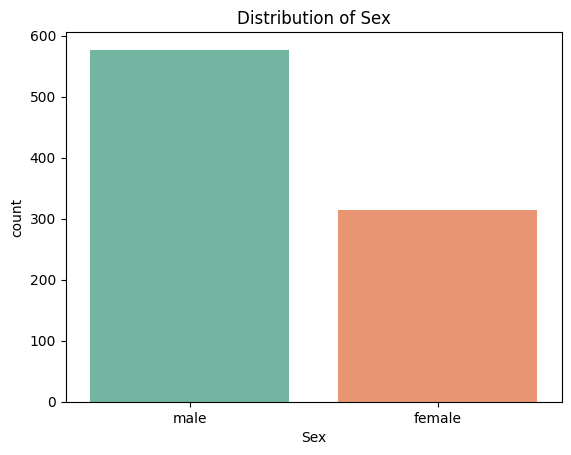

<ipython-input-10-3ab1e939258d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette="Set2")


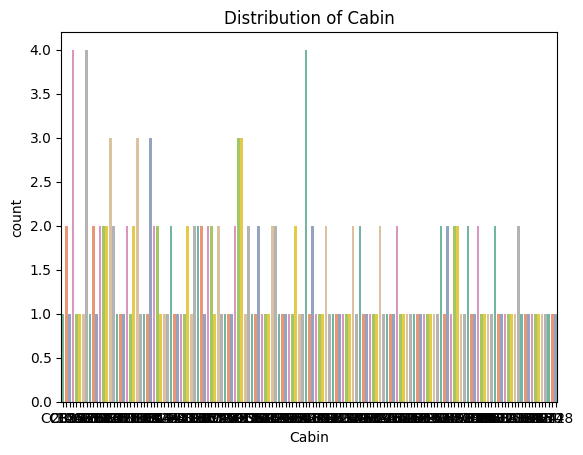

<ipython-input-10-3ab1e939258d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette="Set2")


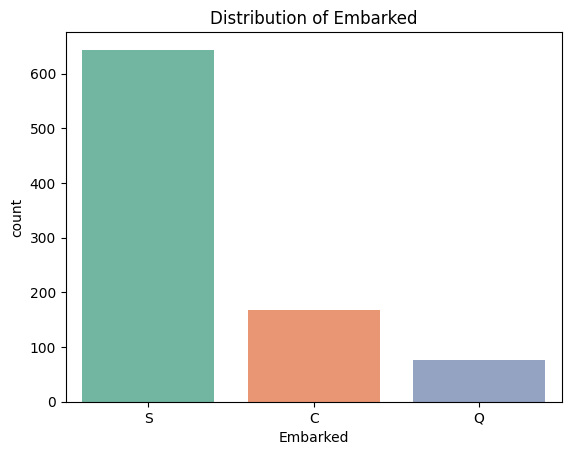

<ipython-input-10-3ab1e939258d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette="Set2")


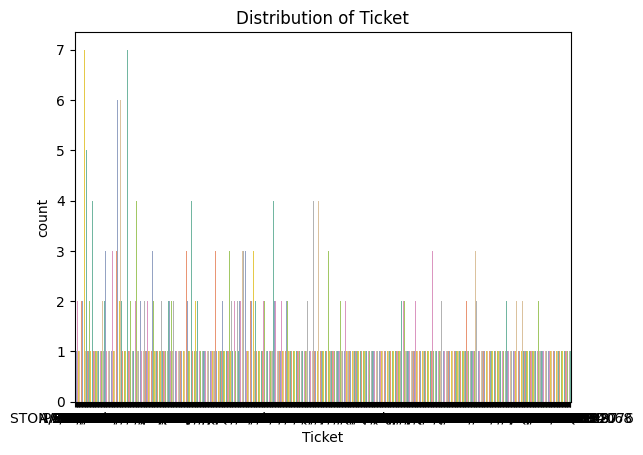

In [10]:
# Separate categorical columns for analysis
df_cat = train_data[["Survived", "Sex", "Cabin", "Embarked", "Ticket"]]

# Visualize categorical features
for col in df_cat.columns:
    sns.countplot(data=train_data, x=col, palette="Set2")
    plt.title(f"Distribution of {col}")
    plt.show()


In [11]:
# Create pivot tables for categorical features based on survival
print(pd.pivot_table(train_data, index="Survived", values=["Age", "SibSp", "Parch", "Fare"]))
print(pd.pivot_table(train_data, index="Survived", columns="Sex", values="Ticket", aggfunc="count"))
print(pd.pivot_table(train_data, index="Survived", columns="Pclass", values="Ticket", aggfunc="count"))
print(pd.pivot_table(train_data, index="Survived", columns="Embarked", values="Ticket", aggfunc="count"))


                Age       Fare     Parch     SibSp
Survived                                          
0         30.626179  22.117887  0.329690  0.553734
1         28.343690  48.395408  0.464912  0.473684
Sex       female  male
Survived              
0             81   468
1            233   109
Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [12]:
# Drop unnecessary columns and fill missing values
train_data = train_data.drop(columns=["PassengerId", "Cabin", "Name", "Ticket"])
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].mean())
train_data["Embarked"] = train_data["Embarked"].fillna(train_data["Embarked"].mode()[0])
train_data["Fare"] = np.log(train_data["Fare"] + 1)  # Log transformation for Fare


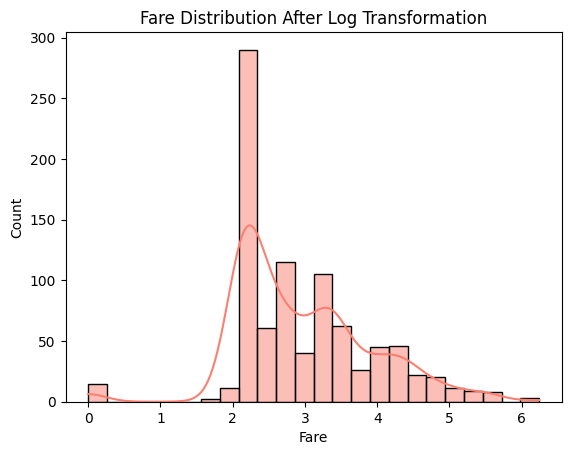

In [13]:
# Plot the distribution of transformed 'Fare'
sns.histplot(train_data["Fare"], kde=True, color="salmon")
plt.title("Fare Distribution After Log Transformation")
plt.show()


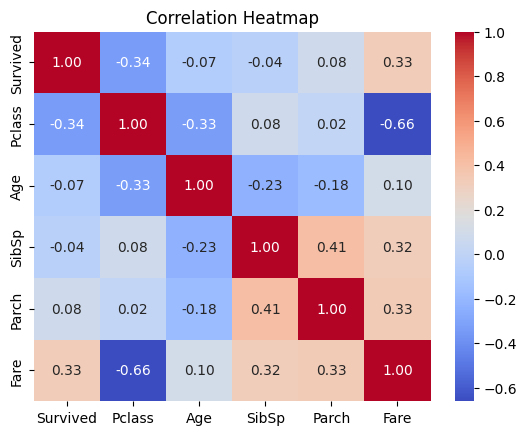

In [14]:
# Display correlation heatmap of numerical variables
corr = train_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [15]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

cols = ["Sex", "Embarked"]
le = LabelEncoder()
for col in cols:
    train_data[col] = le.fit_transform(train_data[col])


In [16]:
# Separate features and target variable
X = train_data.drop(columns=["Survived"])
y = train_data["Survived"]

# Split data into training and test sets
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

# Define function to evaluate model performance
def classify(model):
    model.fit(X_train, y_train)
    print("Accuracy on test set:", model.score(X_test, y_test))
    cv_score = cross_val_score(model, X, y, cv=5)
    print("Cross-validation score:", np.mean(cv_score))


In [17]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and evaluate Decision Tree Classifier
dt_model = DecisionTreeClassifier()
print("Decision Tree Classifier:")
classify(dt_model)


Decision Tree Classifier:
Accuracy on test set: 0.7713004484304933
Cross-validation score: 0.7677233067604042


In [18]:
from xgboost import XGBClassifier

# Initialize and evaluate XGB Classifier
xgb_model = XGBClassifier()
print("\nXGBoost Classifier:")
classify(xgb_model)



XGBoost Classifier:
Accuracy on test set: 0.8161434977578476
Cross-validation score: 0.8148327160881301


In [19]:
# Fit the XGBClassifier on the entire dataset for final predictions
xgb_model.fit(X, y)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [20]:
# Preprocess test data similarly to train data
X_test_data = test.drop(columns=["PassengerId", "Name", "Cabin", "Ticket"])
X_test_data["Age"] = X_test_data["Age"].fillna(X_test_data["Age"].mean())
X_test_data["Fare"] = X_test_data["Fare"].fillna(X_test_data["Fare"].mean())

for col in cols:
    X_test_data[col] = le.fit_transform(X_test_data[col])

# Make predictions using the XGBClassifier
predictions = xgb_model.predict(X_test_data)


In [24]:
# Display the first few rows of predictions alongside PassengerId from the test set
# Adding PassengerId to ensure easy reference to the predicted results
predictions_df = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Predicted Survived": predictions
})

# Display the predictions
print("Prediction Results:")
print(predictions_df.head(10))  # Display first 10 results for quick view


Prediction Results:
   PassengerId  Predicted Survived
0          892                   1
1          893                   0
2          894                   0
3          895                   0
4          896                   0
5          897                   0
6          898                   1
7          899                   0
8          900                   0
9          901                   0
